#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT VALUE OF "SURVIVED" FEATURE OF TITANIC KAGGLE CASE

In [83]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import svm
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest


from xgboost import XGBClassifier

#### LOADING TRAIN AND TEST DATA

In [84]:
data_train = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Titanic - Machine Learning from Disaster/train.csv")
data_test = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Titanic - Machine Learning from Disaster/test.csv")

#### PRINTING DATA TRAIN

In [85]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### CREATING AND PRINTING DATASET AS A LIST

In [86]:
dataset = [data_train, data_test]

dataset

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

#### DATASET DUPLICATES CHECKING

In [87]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### PRINTING INFORMATION OF DATA TRAIN - WE WANT TO KNOW HOW MANY CELLS OF DATA TRAIN ARE NOT-NULL AND WHAT TYPE OF DATA IS DEFINED FOR DIFFERENT FEATURES (COLUMNS)

In [88]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### PRINTING SUM OF NULL DATA FOR DATASET

In [89]:
for data in dataset:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### DEFINING PRECENTAGE_MISSING_VALUES FUNCTION TO PLOT PERCENTAGES OF MISSING VALUES FOR EACH FEATURE

In [90]:
def Percentage_Missing_Values(df, missing_data_treshold):
    
    features_to_drop = []
        
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
                      
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='vertical')
        sns.barplot(x=na_df.index, y=na_df)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
        for missing_index, missing_value in zip(missing_data['Missing Ratio %'].index, missing_data['Missing Ratio %'].values):
            if missing_value > missing_data_treshold:
                features_to_drop.append(missing_index)
                        
        return features_to_drop
                    
    else:
        print('No NAs found')

#### PLOTTING BAR CHART FOR DATA TRAIN WITH % OF MISSING VALUES FOR EACH FEATURE

['Cabin', 'Age']

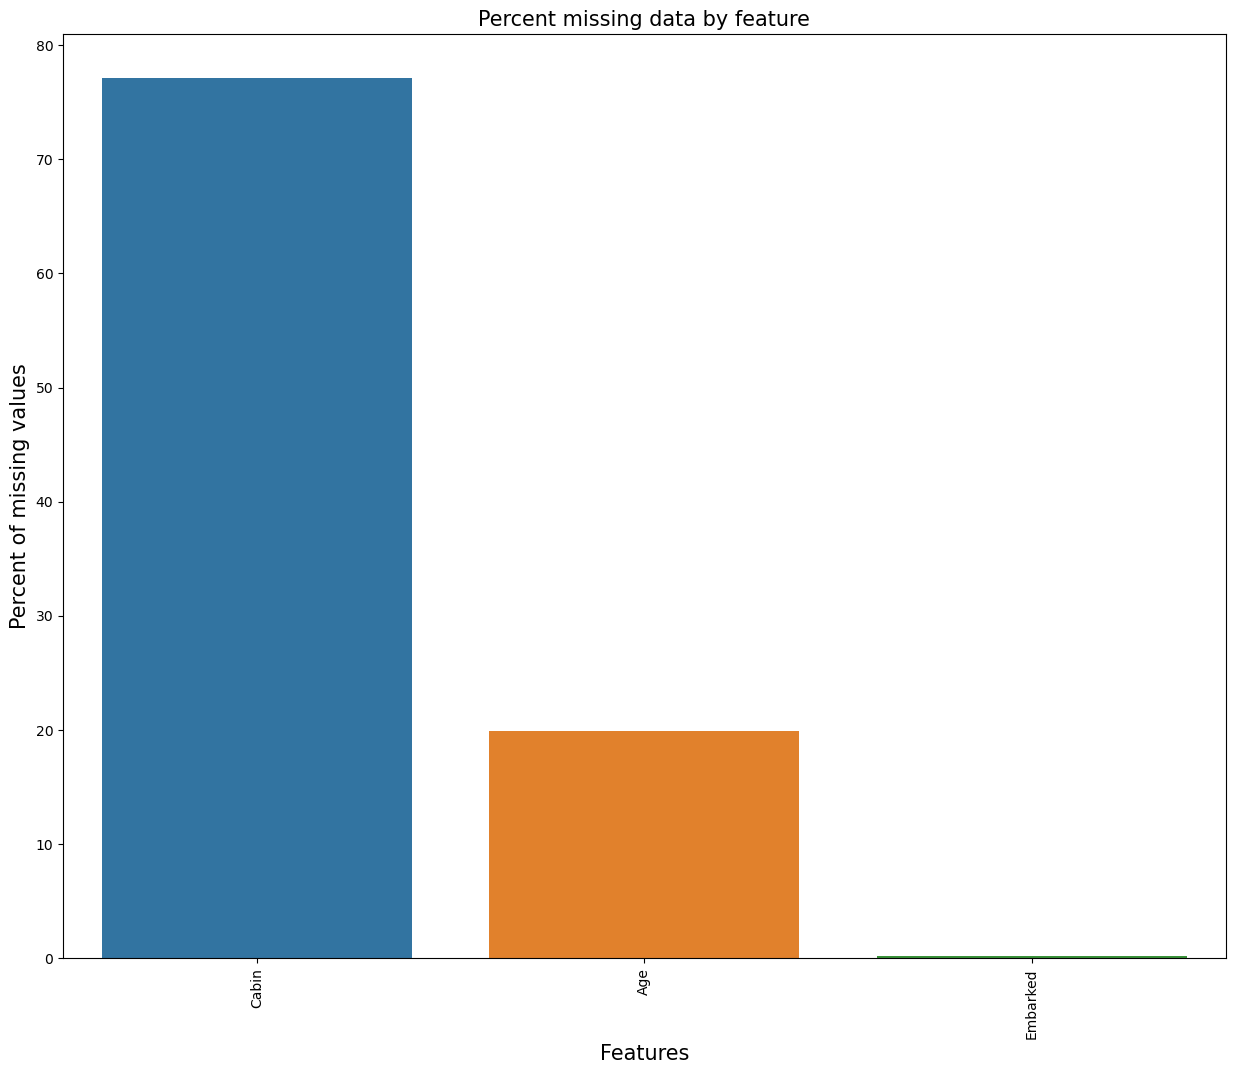

In [91]:
Percentage_Missing_Values(data_train, 10)

#### PLOTTING BAR CHART FOR DATA TEST WITH % OF MISSING VALUES FOR EACH FEATURE

['Cabin', 'Age']

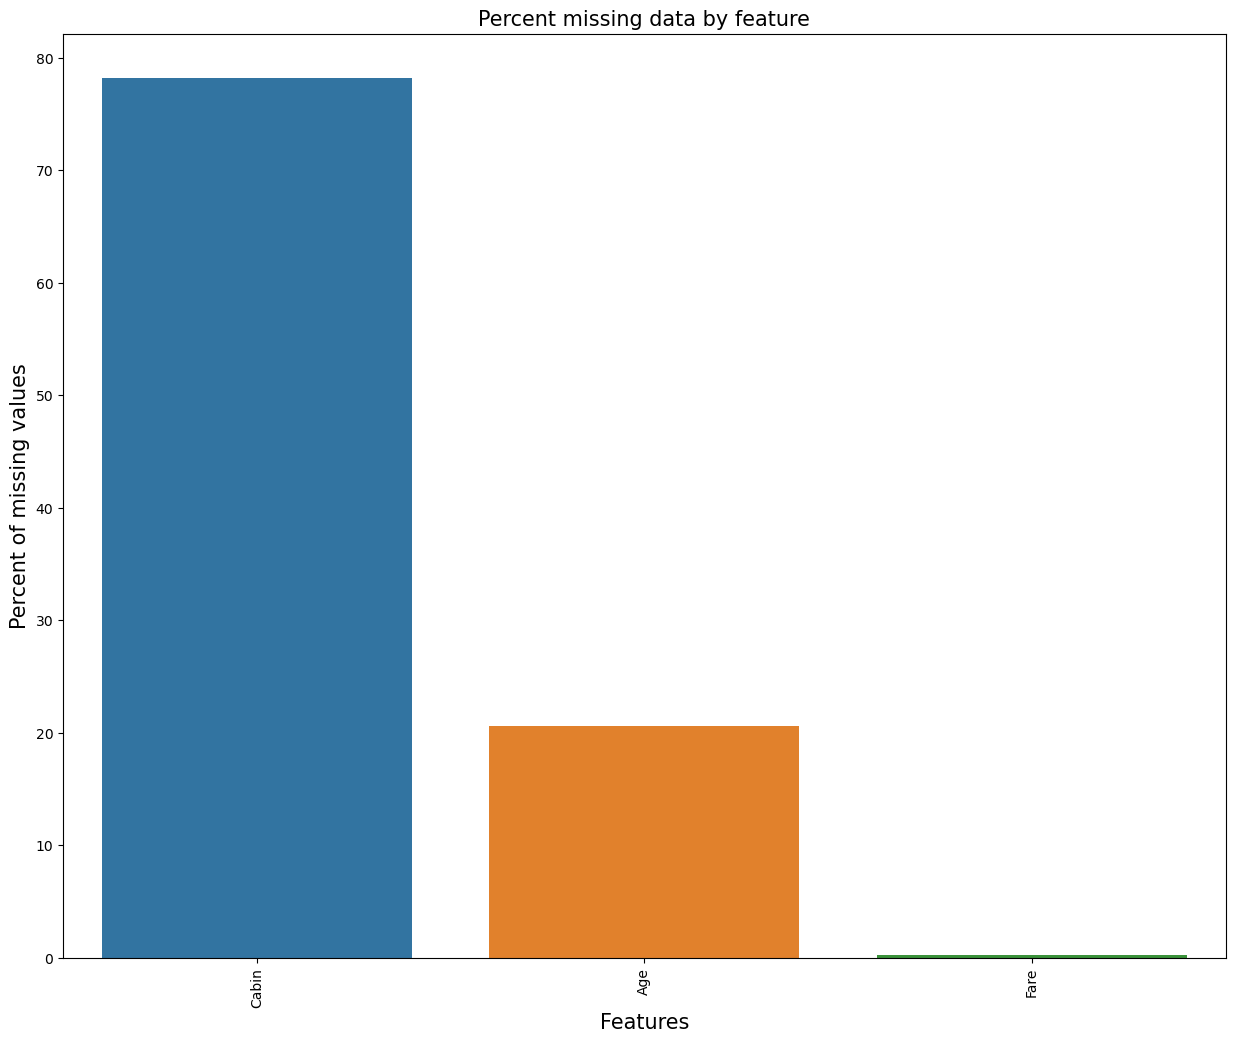

In [92]:
Percentage_Missing_Values(data_test, 10)

#### PRINTING UNIQUE VALUES OF DATA FOR DATASET

In [93]:
for data in dataset:
    print(data.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


#### PLOTTING BAR CHART AND PIE PLOT TO CHECK IMBALANCE OF DEPENDENT FEATURE

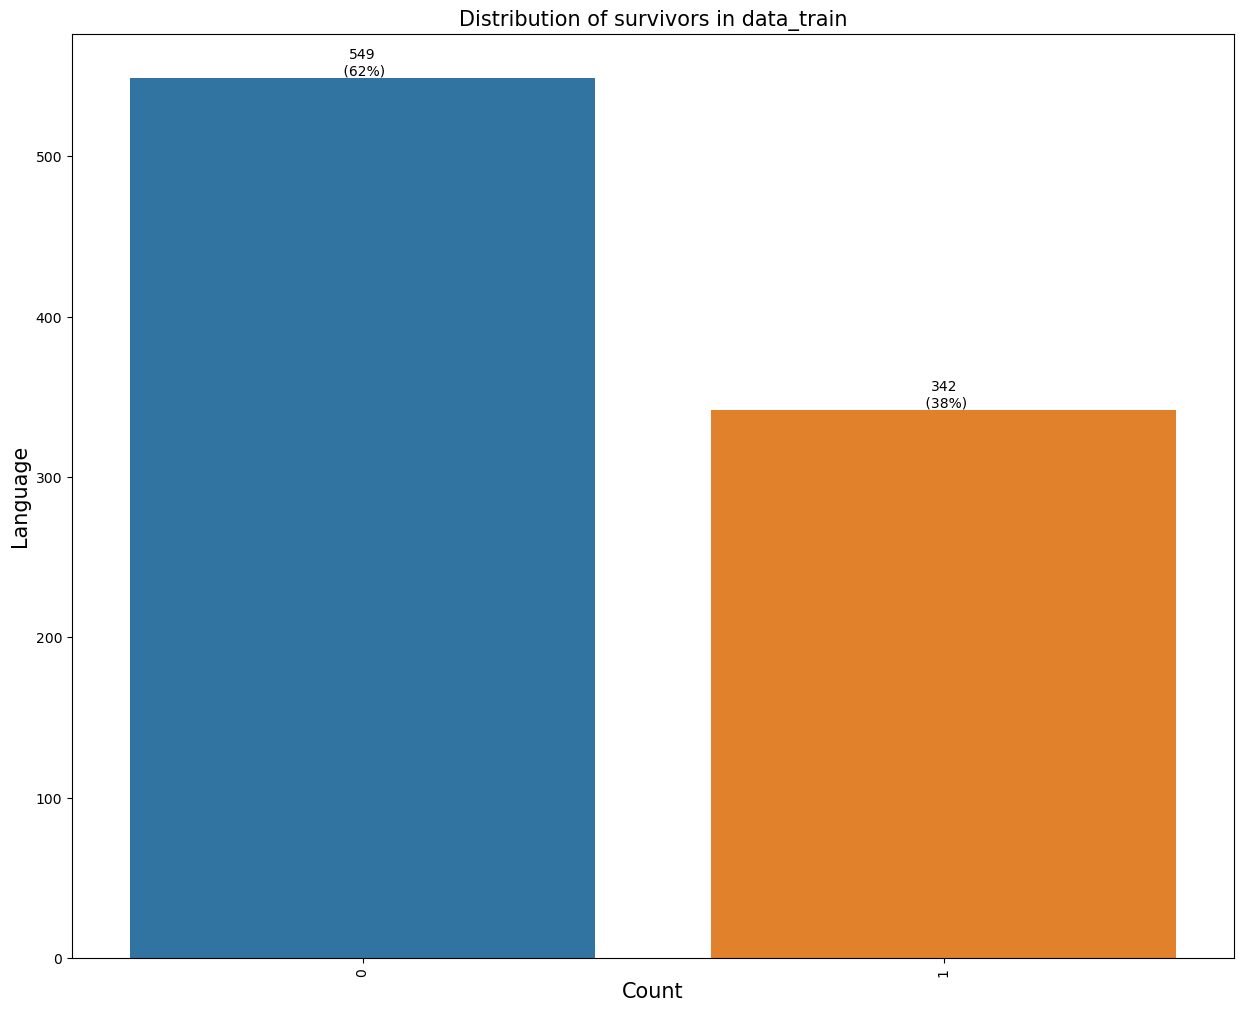

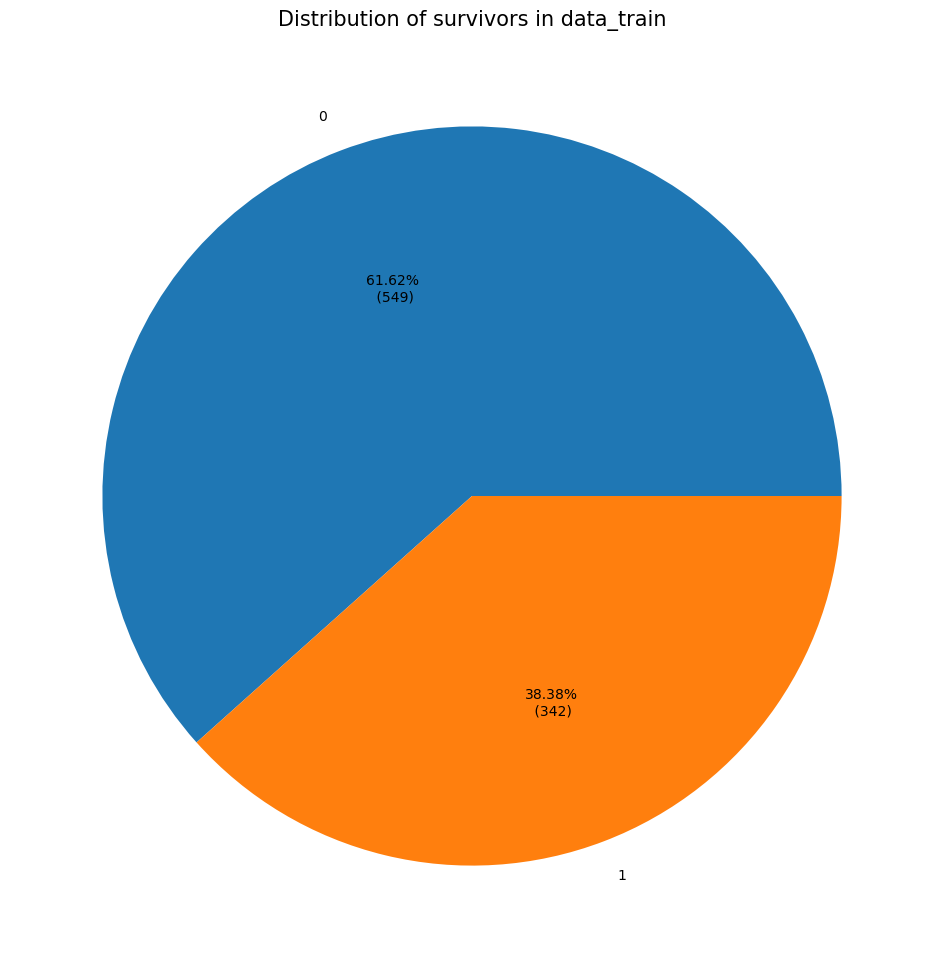

In [94]:
absolute_values = data_train['Survived'].value_counts()
relative_values = data_train['Survived'].value_counts(ascending=False, normalize=True).values * 100
bar_labels = [f'{values[0]}\n ({values[1]:.0f}%)' for values in zip(absolute_values, relative_values)]

plt.subplots(figsize=(15, 12))
ax = sns.barplot(x=data_train['Survived'].value_counts().index, 
                 y=data_train['Survived'].value_counts(), errorbar=None)
ax.bar_label(ax.containers[0], 
             fontsize=10, 
             labels=bar_labels)
plt.xticks(rotation='vertical')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Language', fontsize=15)
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()


plt.subplots(figsize=(15, 12))
plt.pie(x=data_train['Survived'].value_counts(), 
        labels=data_train['Survived'].unique(), 
        autopct= lambda value: '{:.2f}%\n ({:.0f})'.format(value,(value/100)*absolute_values.sum()))
plt.title('Distribution of survivors in data_train', fontsize=15)
plt.show()

#### PRINTING FIRST 5 OBSERVATIONS FOR DATA_TRAIN

In [95]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SURVIVED FEATURE

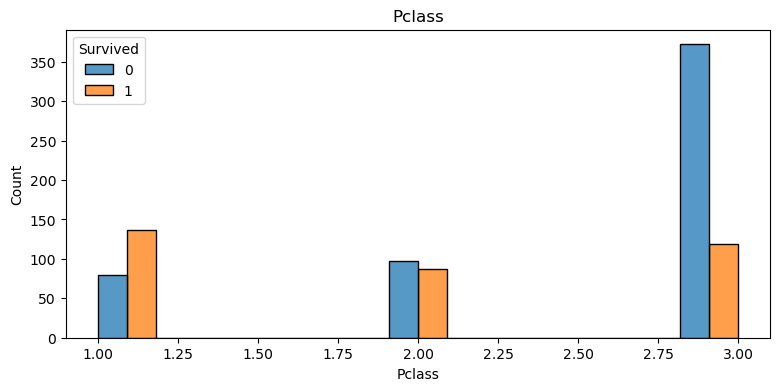

In [96]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Pclass',
             hue='Survived',
             multiple='dodge')
plt.title('Pclass')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SEX FEATURE

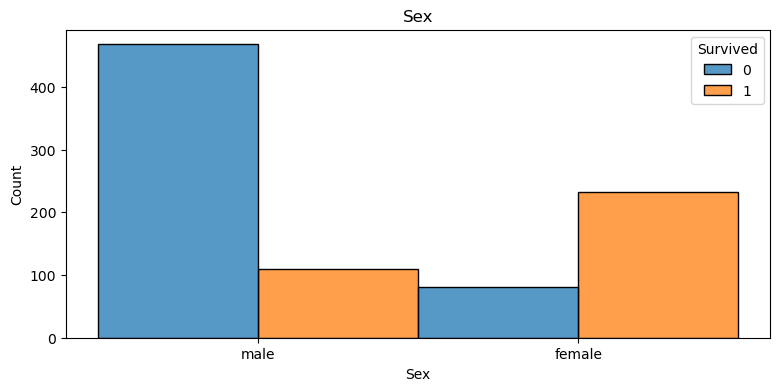

In [97]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Sex',
             hue='Survived',
             multiple='dodge')
plt.title('Sex')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO AGE FEATURE

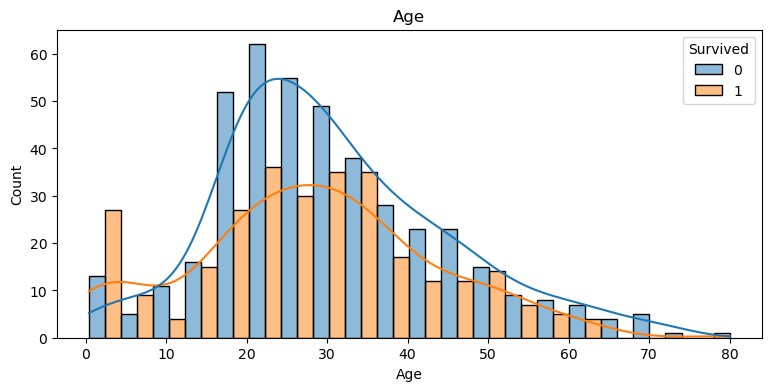

In [98]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Age',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Age')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO SIBLINGS FEATURE

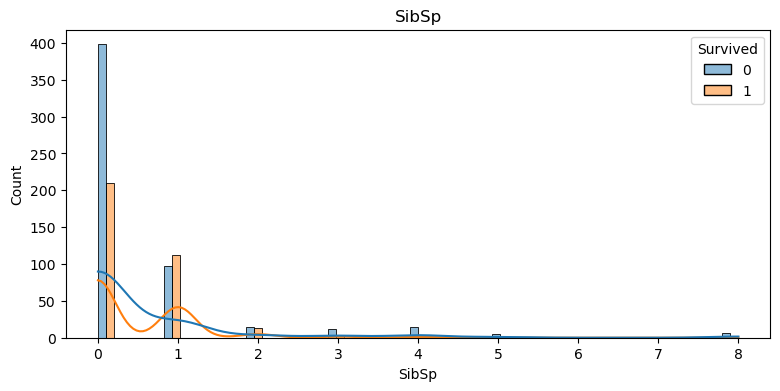

In [99]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='SibSp',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('SibSp')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO PARCH FEATURE

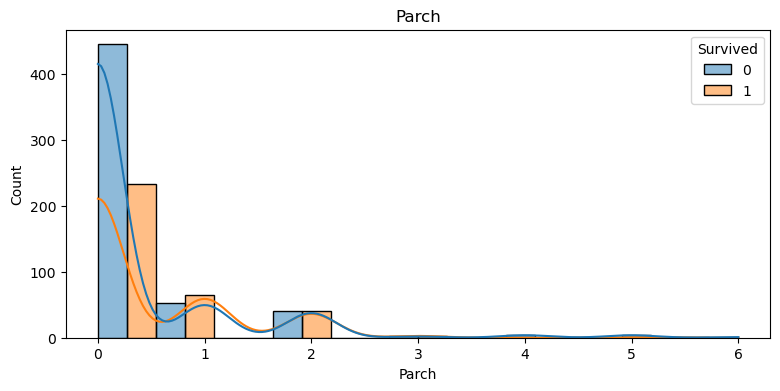

In [100]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Parch',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Parch')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO FARE FEATURE

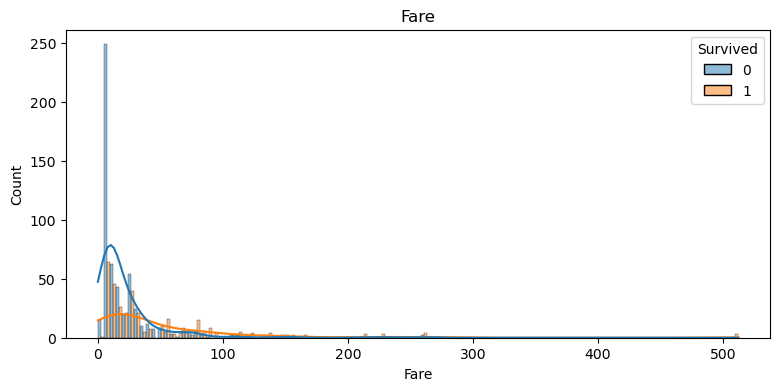

In [101]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Fare',
             hue='Survived',
             multiple='dodge',
             kde=True)
plt.title('Fare')
plt.show()

#### PLOTTING BAR CHART OF PCLASS FEATURE IN RELATION TO EMBARKED FEATURE

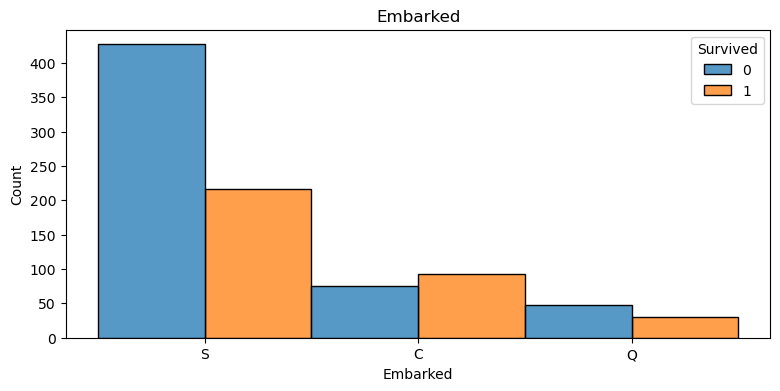

In [102]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data_train,
             x='Embarked',
             hue='Survived',
             multiple='dodge')
plt.title('Embarked')
plt.show()

#### DELETING PASSENGER_ID, NAME, TICKET AND CABIN FEATURES FROM DATASET

In [103]:
for data in dataset:
    del data['PassengerId']
    del data['Name']
    del data['Ticket']
    del data['Cabin']

#### PRINTING DATA_TRAIN

In [104]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### PRINTING SUM OF NULL DATA FOR DATASET

In [105]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----

#### FILLING MISSING VALUES WITH MEAN FOR NUMERIC ENTITIES AND MODE FOR CATEGORICAL FEATURES

In [106]:
for data in dataset:
    data['Age'].fillna(value = data['Age'].mean(), inplace= True)
    data['Embarked'].fillna(value = data['Embarked'].mode().iloc[0], inplace= True)
    data['Fare'].fillna(value = data['Fare'].mean(), inplace= True)

#### PRINTING SUM OF NULL DATA FOR DATASET

In [107]:
for data in dataset:
    print(data.isnull().sum())
    print(data.info())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 n

#### JOINING ENCODED FEATURES WITH DATA_TRAIN

In [108]:
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Pclass'], drop_first = True)], axis= 1)
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Sex'], drop_first = True)], axis= 1)
data_train = pd.concat([data_train, pd.get_dummies(data = data_train['Embarked'], drop_first = True)], axis= 1)

data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,0,3,male,22.000000,1,0,7.2500,S,0,1,1,0,1
1,1,1,female,38.000000,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,0,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0,1,0,1
887,1,1,female,19.000000,0,0,30.0000,S,0,0,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,0,1,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,0,0,1,0,0


#### JOINING ENCODED FEATURES WITH DATA_TEST

In [109]:
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Pclass'], drop_first = True)], axis= 1)
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Sex'], drop_first = True)], axis= 1)
data_test = pd.concat([data_test, pd.get_dummies(data = data_test['Embarked'], drop_first = True)], axis= 1)

data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,2,3,male,Q,S
0,3,male,34.50000,0,0,7.8292,Q,0,1,1,1,0
1,3,female,47.00000,1,0,7.0000,S,0,1,0,0,1
2,2,male,62.00000,0,0,9.6875,Q,1,0,1,1,0
3,3,male,27.00000,0,0,8.6625,S,0,1,1,0,1
4,3,female,22.00000,1,1,12.2875,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,0,1,1,0,1
414,1,female,39.00000,0,0,108.9000,C,0,0,0,0,0
415,3,male,38.50000,0,0,7.2500,S,0,1,1,0,1
416,3,male,30.27259,0,0,8.0500,S,0,1,1,0,1


#### CREATING DATASET WITH DATA_TRAIN AND DATA_TEST

In [110]:
dataset = [data_train, data_test]

#### DELETING ENCODED FEATURES

In [111]:
for data in dataset:
    del data['Pclass']
    del data['Sex']
    del data['Embarked']

#### PRINTING DATA_TRAIN

In [112]:
data_train

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.000000,1,0,7.2500,0,1,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,1
888,0,29.699118,1,2,23.4500,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,0,1,0,0


#### PLOTTING CORRELATION PLOT FOR ALL FEATURES

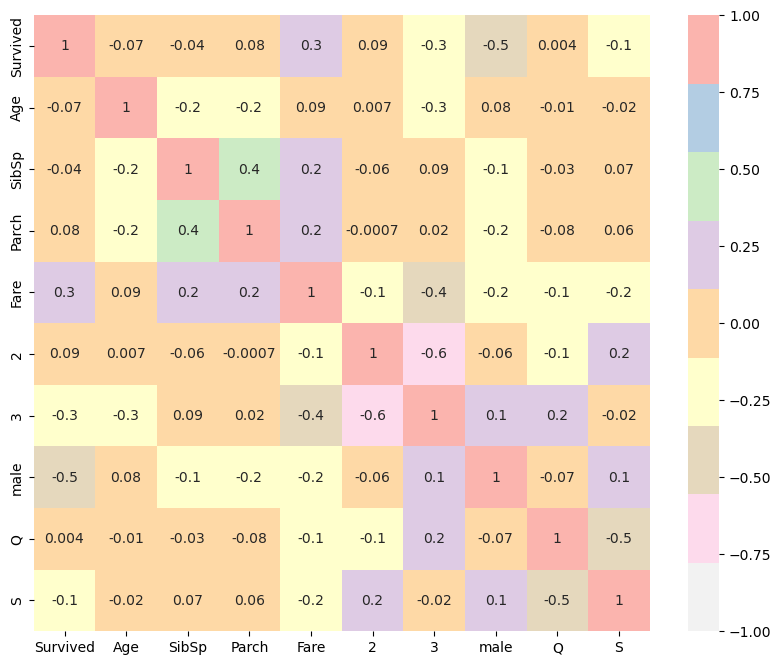

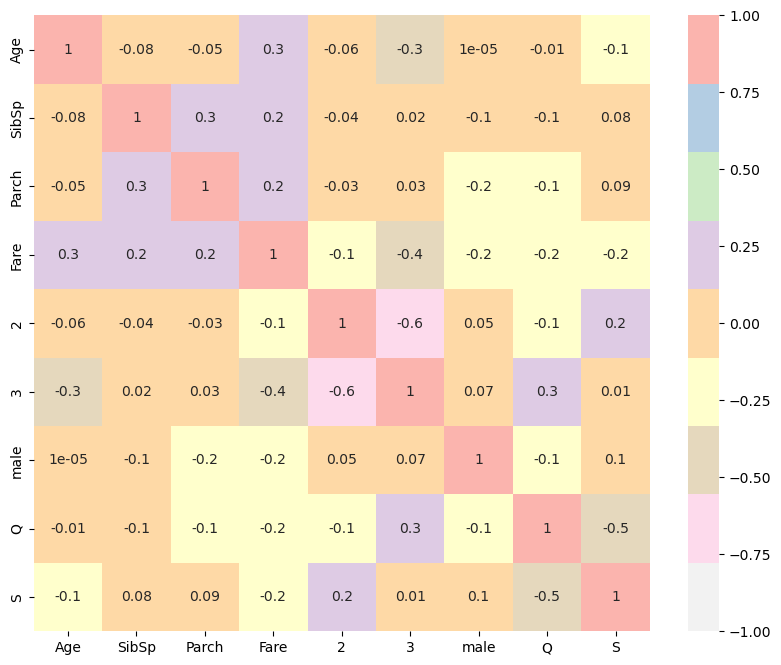

In [113]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                annot= True,
                fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### DEFINING FUNCTIONS TO CHECK FOR MULTICOLLINEARITY OF FEATURES IN DATASET

In [114]:
def corr_v1(df, cut) :
        
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    drop = []

        
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
		# Else: drop(row)
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(df.columns[[item for item in drop_set]])
    
    return(dropcols_names)

def calcDrop(res):
    # All variables with correlation > cutoff
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # All unique variables in drop column
    poss_drop = list(set(res['drop'].tolist()))

    # Keep any variable not in drop column
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    # Drop any variables in same row as a keep variable
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    # Remove drop variables from possible drop 
    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    # subset res dataframe to include possible drop pairs
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    # remove rows that are decided (drop), take set and add to drops
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corr_v2(df, cut) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = []
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)

#### PRINTING FEATURES WHICH CAUSES MULTICOLLINEARITY IN DATA_TRAIN

In [115]:
drop = corr_v1(data_train, 0.75)
print(drop)

drop_new = corr_v2(data_train, 0.75)
print(drop_new)
      
print(list(set(drop).difference(set(drop_new)))) 

[]
[]
[]


#### PRINTING FEATURES WHICH CAUSES MULTICOLLINEARITY IN DATA_TEST

In [116]:
drop = corr_v1(data_test, 0.75)
print(drop)

drop_new = corr_v2(data_test, 0.75)
print(drop_new)
      
print(list(set(drop).difference(set(drop_new)))) 

[]
[]
[]


#### DEFINING CLASSIFICATION MODELS WITH HYPERPARAMETERS

In [117]:
models = [
    make_pipeline(RobustScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l1', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(RobustScaler(), LogisticRegression(class_weight='balanced', 
                                                       solver='liblinear', 
                                                       penalty='l2', 
                                                       C=0.4, 
                                                       random_state=42)),
    make_pipeline(RobustScaler(), svm.SVC(C=0.4)),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),  
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier()
    ]

#### DEFINING X_TRAIN, Y_TRAIN, X_TEST TO TRAIN MODELS ON

In [118]:
X_train = data_train.drop('Survived', axis= 1)
y_train = data_train['Survived']

X_test = data_test

#### DEFINING CROSS-VALIDATION TO AVOID OVER-FITTING

In [119]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### TRAINING ALL MODELS ON TRAIN DATA AND PRINTING ACCURACY SCORE FOR ALL MODELS

In [120]:
model_name = []
train_score_before_outliers_detection = []
test_score_before_outliers_detection = []

for model in models:
    model.fit(X_train.values,y_train)
    score = cross_validate(model, X_train.values, y_train, cv=kfold, scoring='accuracy', return_train_score=True)
    model_name.append(type(model).__name__)
    train_score_before_outliers_detection.append(score['train_score'].mean())
    test_score_before_outliers_detection.append(score['test_score'].mean())
    print(type(model).__name__)
    print(score['train_score'].mean())
    print(score['test_score'].mean())

Pipeline
0.7912468285610729
0.7811499591990458
Pipeline
0.7909667176198056
0.7800263636934279
Pipeline
0.8187434010432261
0.8080848659845584
KNeighborsClassifier
0.7982633909576564
0.6959136275186742
DecisionTreeClassifier
0.9845675024032021
0.7654321762601218
RandomForestClassifier
0.9845675024032021
0.8081413596133326
GradientBoostingClassifier
0.9009541894511244
0.8182035026049841
XGBClassifier
0.97110011503853
0.8125918021467579
ExtraTreesClassifier
0.9845675024032021
0.7957692549118072
AdaBoostClassifier
0.8355780292166349
0.8036532546607245


#### PRINTING DATAFRAME WITH SCORES FOR ALL MODELS

In [121]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
                      pd.DataFrame(train_score_before_outliers_detection).rename(columns={pd.DataFrame(train_score_before_outliers_detection).columns[0]: 'Accuracy score train before outlier detection'}), 
                      pd.DataFrame(test_score_before_outliers_detection).rename(columns={pd.DataFrame(test_score_before_outliers_detection).columns[0]: 'Accuracy score test before outlier detection'})], 
                      axis=1)

overview

,Model name,Accuracy score train before outlier detection,Accuracy score test before outlier detection
0,Pipeline,0.791247,0.781150
1,Pipeline,0.790967,0.780026
2,Pipeline,0.818743,0.808085
3,KNeighborsClassifier,0.798263,0.695914
4,DecisionTreeClassifier,0.984568,0.765432
5,RandomForestClassifier,0.984568,0.808141
6,GradientBoostingClassifier,0.900954,0.818204
7,XGBClassifier,0.971100,0.812592
8,ExtraTreesClassifier,0.984568,0.795769
9,AdaBoostClassifier,0.835578,0.803653
